In [8]:
pip install pmdarima

     -------------------------------------- 572.7/572.7 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from pandas import DataFrame


In [2]:

data = pd.read_csv('C:/Pythondatasets/Dataset_Sarajevo_Sa_Diskretnim_Vremenom.csv', parse_dates=True, index_col='Date (LT)')
data

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,pomocna,diskretno_vrijeme
Date (LT),,,,,,,,,,,,,,,
2018-05-22 17:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,17,10.0,42,Good,7.0,UG/M3,1 Hr,Valid,NaN,0
2018-05-22 18:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,18,15.7,59,Moderate,20.0,UG/M3,1 Hr,Valid,5/22/2018 17:00,1
2018-05-22 19:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,19,14.2,55,Moderate,13.0,UG/M3,1 Hr,Valid,5/22/2018 18:00,2
2018-05-22 20:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,20,16.7,61,Moderate,19.0,UG/M3,1 Hr,Valid,5/22/2018 19:00,3
2018-05-22 21:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,21,13.8,55,Moderate,11.0,UG/M3,1 Hr,Valid,5/22/2018 20:00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09 21:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,21,8.1,34,Good,10.0,UG/M3,1 Hr,Valid,5/9/2023 20:00,38623
2023-05-09 22:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,22,10.0,42,Good,12.0,UG/M3,1 Hr,Valid,5/9/2023 21:00,38624
2023-05-09 23:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,23,12.5,52,Moderate,15.0,UG/M3,1 Hr,Valid,5/9/2023 22:00,38625


In [3]:
newdf = data.drop("pomocna", axis='columns')
newdf

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name,diskretno_vrijeme
Date (LT),,,,,,,,,,,,,,
2018-05-22 17:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,17,10.0,42,Good,7.0,UG/M3,1 Hr,Valid,0
2018-05-22 18:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,18,15.7,59,Moderate,20.0,UG/M3,1 Hr,Valid,1
2018-05-22 19:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,19,14.2,55,Moderate,13.0,UG/M3,1 Hr,Valid,2
2018-05-22 20:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,20,16.7,61,Moderate,19.0,UG/M3,1 Hr,Valid,3
2018-05-22 21:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,21,13.8,55,Moderate,11.0,UG/M3,1 Hr,Valid,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09 21:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,21,8.1,34,Good,10.0,UG/M3,1 Hr,Valid,38623
2023-05-09 22:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,22,10.0,42,Good,12.0,UG/M3,1 Hr,Valid,38624
2023-05-09 23:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,23,12.5,52,Moderate,15.0,UG/M3,1 Hr,Valid,38625


In [5]:
newdf = newdf.drop("pomocna", axis='columns')
newdf

,Site,Parameter,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
Date (LT),,,,,,,,,,,,,
2018-05-22 17:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,17,10.0,42,Good,7.0,UG/M3,1 Hr,Valid
2018-05-22 18:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,18,15.7,59,Moderate,20.0,UG/M3,1 Hr,Valid
2018-05-22 19:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,19,14.2,55,Moderate,13.0,UG/M3,1 Hr,Valid
2018-05-22 20:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,20,16.7,61,Moderate,19.0,UG/M3,1 Hr,Valid
2018-05-22 21:00:00,Sarajevo,PM2.5 - Principal,2018,5,22,21,13.8,55,Moderate,11.0,UG/M3,1 Hr,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-09 21:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,21,8.1,34,Good,10.0,UG/M3,1 Hr,Valid
2023-05-09 22:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,22,10.0,42,Good,12.0,UG/M3,1 Hr,Valid
2023-05-09 23:00:00,Sarajevo,PM2.5 - Principal,2023,5,9,23,12.5,52,Moderate,15.0,UG/M3,1 Hr,Valid


In [3]:
series = data['AQI'].squeeze()
series

Date (LT)
2018-05-22 17:00:00    42
2018-05-22 18:00:00    59
2018-05-22 19:00:00    55
2018-05-22 20:00:00    61
2018-05-22 21:00:00    55
                       ..
2023-05-09 21:00:00    34
2023-05-09 22:00:00    42
2023-05-09 23:00:00    52
2023-05-10 00:00:00    49
2023-05-10 01:00:00    49
Name: AQI, Length: 41470, dtype: int64

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    AQI   No. Observations:                41470
Model:                 ARIMA(0, 1, 5)   Log Likelihood             -155320.843
Date:                Wed, 30 Aug 2023   AIC                         310653.686
Time:                        11:10:10   BIC                         310705.482
Sample:                             0   HQIC                        310670.053
                              - 41470                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3441      0.002    171.662      0.000       0.340       0.348
ma.L2          0.1225      0.003     44.681      0.000       0.117       0.128
ma.L3          0.0192      0.003      6.124      0.0

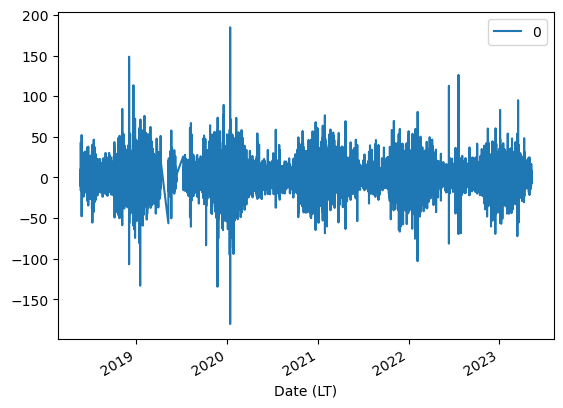

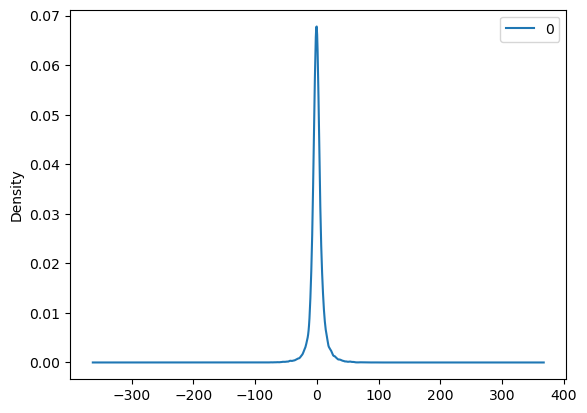

                  0
count  41470.000000
mean       0.001124
std       10.244442
min     -180.204629
25%       -4.307568
50%       -0.352401
75%        3.836914
max      184.718394


In [6]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from pandas import DataFrame

# fit model
model = ARIMA(series, order=(0,1,5))
modelfit = model.fit()
# summary of fit model
print(modelfit.summary())
# line plot of residuals
residuals = DataFrame(modelfit.resid)
residuals.plot()
pyplot.savefig('C:/Pythondatasets/ARIMA_Prediction_Residuals_Sarajevo.png')
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.savefig('C:/Pythondatasets/ARIMA_Prediction_Residuals_Density_Sarajevo.png')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

<AxesSubplot:xlabel='Date (LT)'>

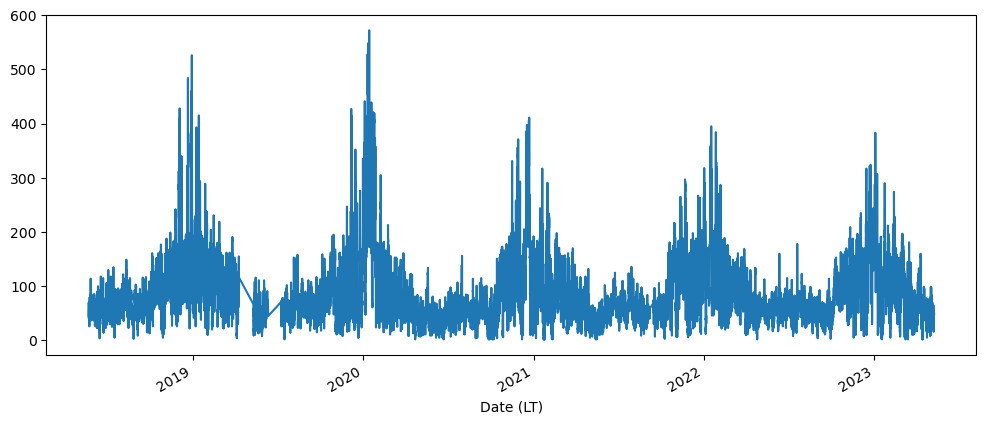

In [7]:
data['AQI'].plot(figsize=(12,5))

In [8]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(data['AQI'])

1. ADF :  -13.306768389393573
2. P-Value :  6.872771924518939e-25
3. Num Of Lags :  55
4. Num Of Observations Used For ADF Regression: 41421
5. Critical Values :
	 1% :  -3.4305078838101366
	 5% :  -2.8616097810830743
	 10% :  -2.566807142218098


In [8]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data['AQI'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=109.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=316283.197, Time=1.97 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=310826.268, Time=4.90 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=311447.826, Time=12.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=316281.197, Time=0.95 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=310827.877, Time=6.39 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=310827.955, Time=6.65 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=310822.736, Time=92.76 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=98.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=310794.270, Time=26.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=310839.473, Time=14.79 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=60.76 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=310772.485, Time=20.61 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=310772.392, Time=26.78 sec
 ARIMA(1,1,4)(0,

In [6]:
X = series
size = int(len(X)* 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [5]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(0,1,5))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

predicted=53.609676, expected=59.000000
predicted=60.513263, expected=56.000000
predicted=55.200868, expected=56.000000
predicted=56.020089, expected=57.000000
predicted=57.354852, expected=58.000000
predicted=58.224255, expected=54.000000
predicted=52.961511, expected=51.000000
predicted=49.745304, expected=51.000000
predicted=50.961669, expected=63.000000
predicted=67.135456, expected=71.000000
predicted=74.174042, expected=79.000000
predicted=81.448256, expected=74.000000
predicted=71.812569, expected=68.000000
predicted=65.101480, expected=66.000000
predicted=65.207826, expected=69.000000
predicted=70.252692, expected=59.000000
predicted=56.424306, expected=45.000000
predicted=40.092031, expected=31.000000
predicted=26.069967, expected=38.000000
predicted=40.577468, expected=52.000000
predicted=58.078007, expected=54.000000
predicted=55.449155, expected=56.000000
predicted=56.005925, expected=57.000000
predicted=56.213546, expected=50.000000
predicted=47.645323, expected=53.000000


predicted=64.979453, expected=63.000000
predicted=61.619912, expected=61.000000
predicted=60.114521, expected=54.000000
predicted=52.178355, expected=56.000000
predicted=56.589113, expected=57.000000
predicted=57.610297, expected=56.000000
predicted=55.887215, expected=62.000000
predicted=63.979981, expected=59.000000
predicted=57.921064, expected=71.000000
predicted=74.776030, expected=77.000000
predicted=79.177737, expected=80.000000
predicted=80.737192, expected=73.000000
predicted=70.459212, expected=68.000000
predicted=65.401412, expected=70.000000
predicted=70.814796, expected=70.000000
predicted=70.512781, expected=64.000000
predicted=62.419515, expected=58.000000
predicted=55.660773, expected=53.000000
predicted=51.164681, expected=57.000000
predicted=58.709728, expected=60.000000
predicted=61.638126, expected=70.000000
predicted=73.370422, expected=74.000000
predicted=75.270823, expected=77.000000
predicted=77.487004, expected=73.000000
predicted=71.413662, expected=67.000000


predicted=52.204524, expected=44.000000
predicted=40.570327, expected=35.000000
predicted=32.203654, expected=30.000000
predicted=28.792857, expected=29.000000
predicted=29.131973, expected=27.000000
predicted=26.940369, expected=26.000000
predicted=25.810170, expected=28.000000
predicted=28.647480, expected=30.000000
predicted=30.769223, expected=38.000000
predicted=40.728355, expected=48.000000
predicted=51.310199, expected=52.000000
predicted=53.186656, expected=58.000000
predicted=59.490902, expected=67.000000
predicted=69.414902, expected=63.000000
predicted=61.598222, expected=65.000000
predicted=65.233690, expected=77.000000
predicted=80.556649, expected=79.000000
predicted=79.944591, expected=75.000000
predicted=73.717279, expected=78.000000
predicted=78.079465, expected=71.000000
predicted=68.549298, expected=62.000000
predicted=59.324827, expected=60.000000
predicted=59.298779, expected=58.000000
predicted=57.527237, expected=53.000000
predicted=52.012346, expected=44.000000


predicted=162.714458, expected=163.000000
predicted=167.865126, expected=176.000000
predicted=179.898807, expected=181.000000
predicted=181.133667, expected=177.000000
predicted=174.202760, expected=172.000000
predicted=170.454639, expected=167.000000
predicted=164.999689, expected=160.000000
predicted=157.957148, expected=156.000000
predicted=154.926431, expected=153.000000
predicted=152.238685, expected=151.000000
predicted=150.667206, expected=140.000000
predicted=136.667742, expected=134.000000
predicted=131.875366, expected=123.000000
predicted=119.648569, expected=126.000000
predicted=127.286571, expected=126.000000
predicted=126.877176, expected=149.000000
predicted=156.647269, expected=155.000000
predicted=157.599295, expected=158.000000
predicted=158.163558, expected=159.000000
predicted=158.543062, expected=159.000000
predicted=158.118047, expected=158.000000
predicted=158.118122, expected=156.000000
predicted=155.255100, expected=131.000000
predicted=122.774820, expected=146

predicted=162.136003, expected=157.000000
predicted=156.447258, expected=154.000000
predicted=152.533967, expected=150.000000
predicted=148.337987, expected=135.000000
predicted=130.253119, expected=159.000000
predicted=166.869267, expected=159.000000
predicted=160.109667, expected=159.000000
predicted=158.967213, expected=163.000000
predicted=163.626141, expected=153.000000
predicted=148.796113, expected=117.000000
predicted=105.872015, expected=108.000000
predicted=104.158377, expected=111.000000
predicted=112.856158, expected=119.000000
predicted=123.687707, expected=117.000000
predicted=117.459263, expected=123.000000
predicted=123.708687, expected=127.000000
predicted=128.026534, expected=157.000000
predicted=166.876891, expected=166.000000
predicted=169.760692, expected=169.000000
predicted=168.953600, expected=174.000000
predicted=174.274605, expected=176.000000
predicted=175.664124, expected=175.000000
predicted=175.214953, expected=171.000000
predicted=169.447101, expected=165

predicted=65.617282, expected=69.000000
predicted=70.622900, expected=70.000000
predicted=69.940241, expected=74.000000
predicted=74.716124, expected=83.000000
predicted=85.776214, expected=89.000000
predicted=91.078892, expected=86.000000
predicted=84.865344, expected=92.000000
predicted=93.207551, expected=74.000000
predicted=67.988438, expected=62.000000
predicted=57.732043, expected=54.000000
predicted=51.517210, expected=54.000000
predicted=54.495668, expected=51.000000
predicted=51.360827, expected=44.000000
predicted=41.676037, expected=49.000000
predicted=50.436836, expected=45.000000
predicted=43.999237, expected=37.000000
predicted=34.663622, expected=29.000000
predicted=26.226196, expected=23.000000
predicted=20.833547, expected=22.000000
predicted=22.367099, expected=25.000000
predicted=26.517883, expected=29.000000
predicted=30.610558, expected=35.000000
predicted=36.952460, expected=56.000000
predicted=62.674014, expected=59.000000
predicted=60.181010, expected=63.000000


predicted=258.187513, expected=246.000000
predicted=245.340195, expected=240.000000
predicted=236.334502, expected=232.000000
predicted=227.711031, expected=224.000000
predicted=221.179707, expected=230.000000
predicted=233.122424, expected=217.000000
predicted=213.261300, expected=212.000000
predicted=210.066579, expected=215.000000
predicted=215.889415, expected=215.000000
predicted=215.437839, expected=197.000000
predicted=191.927950, expected=186.000000
predicted=181.501983, expected=184.000000
predicted=183.304730, expected=179.000000
predicted=178.486102, expected=178.000000
predicted=178.552231, expected=176.000000
predicted=175.219176, expected=174.000000
predicted=173.274236, expected=177.000000
predicted=178.234674, expected=176.000000
predicted=175.849962, expected=171.000000
predicted=169.407123, expected=170.000000
predicted=169.424081, expected=171.000000
predicted=171.341524, expected=170.000000
predicted=170.083486, expected=170.000000
predicted=170.078527, expected=174

predicted=308.447952, expected=269.000000
predicted=262.130047, expected=275.000000
predicted=276.204621, expected=287.000000
predicted=290.345555, expected=289.000000
predicted=289.012860, expected=288.000000
predicted=289.400025, expected=274.000000
predicted=267.754479, expected=266.000000
predicted=262.845259, expected=247.000000
predicted=241.294482, expected=223.000000
predicted=215.515259, expected=224.000000
predicted=224.760785, expected=236.000000
predicted=240.940027, expected=239.000000
predicted=241.597641, expected=247.000000
predicted=249.464643, expected=246.000000
predicted=244.677171, expected=256.000000
predicted=258.854344, expected=260.000000
predicted=261.680588, expected=262.000000
predicted=262.414967, expected=261.000000
predicted=260.381619, expected=259.000000
predicted=257.735500, expected=193.000000
predicted=171.653502, expected=164.000000
predicted=152.925740, expected=127.000000
predicted=115.857554, expected=85.000000
predicted=73.695368, expected=65.00

predicted=77.615667, expected=63.000000
predicted=55.151767, expected=50.000000
predicted=46.722669, expected=72.000000
predicted=80.081026, expected=104.000000
predicted=116.455069, expected=138.000000
predicted=149.862159, expected=154.000000
predicted=158.276276, expected=155.000000
predicted=152.949209, expected=159.000000
predicted=158.671092, expected=161.000000
predicted=161.220337, expected=161.000000
predicted=161.311219, expected=160.000000
predicted=159.565589, expected=153.000000
predicted=150.282371, expected=126.000000
predicted=117.045092, expected=120.000000
predicted=117.601631, expected=102.000000
predicted=96.908243, expected=90.000000
predicted=86.933906, expected=84.000000
predicted=82.823298, expected=95.000000
predicted=98.780999, expected=102.000000
predicted=105.636535, expected=119.000000
predicted=124.597580, expected=134.000000
predicted=138.670894, expected=155.000000
predicted=161.229294, expected=101.000000
predicted=83.150350, expected=69.000000
predicte

predicted=153.038797, expected=137.000000
predicted=129.228078, expected=90.000000
predicted=74.068860, expected=76.000000
predicted=72.010236, expected=60.000000
predicted=56.531723, expected=47.000000
predicted=44.459367, expected=32.000000
predicted=28.178132, expected=24.000000
predicted=20.980648, expected=22.000000
predicted=22.336875, expected=32.000000
predicted=36.100770, expected=59.000000
predicted=68.641262, expected=53.000000
predicted=51.390987, expected=43.000000
predicted=38.414063, expected=47.000000
predicted=46.972266, expected=53.000000
predicted=55.276777, expected=67.000000
predicted=72.992995, expected=54.000000
predicted=49.626985, expected=49.000000
predicted=45.940091, expected=59.000000
predicted=61.961519, expected=103.000000
predicted=118.314107, expected=146.000000
predicted=161.996452, expected=104.000000
predicted=89.356811, expected=116.000000
predicted=115.711611, expected=91.000000
predicted=81.812016, expected=78.000000
predicted=74.823719, expected=

predicted=132.698489, expected=134.000000
predicted=135.244298, expected=122.000000
predicted=118.777699, expected=95.000000
predicted=85.631027, expected=90.000000
predicted=87.543081, expected=88.000000
predicted=88.440222, expected=75.000000
predicted=72.223858, expected=69.000000
predicted=67.187825, expected=68.000000
predicted=67.217802, expected=70.000000
predicted=71.359898, expected=70.000000
predicted=70.725424, expected=57.000000
predicted=52.514728, expected=53.000000
predicted=51.146959, expected=50.000000
predicted=49.202347, expected=55.000000
predicted=57.295183, expected=67.000000
predicted=71.603200, expected=63.000000
predicted=61.650813, expected=68.000000
predicted=69.074997, expected=65.000000
predicted=63.650940, expected=57.000000
predicted=54.254422, expected=45.000000
predicted=41.161723, expected=35.000000
predicted=31.363232, expected=40.000000
predicted=42.176662, expected=43.000000
predicted=44.894053, expected=40.000000
predicted=39.413679, expected=49.00

predicted=29.445246, expected=26.000000
predicted=25.616802, expected=30.000000
predicted=31.133384, expected=29.000000
predicted=28.568295, expected=29.000000
predicted=28.765983, expected=31.000000
predicted=31.755027, expected=28.000000
predicted=26.930565, expected=24.000000
predicted=22.684532, expected=18.000000
predicted=15.856358, expected=18.000000
predicted=18.008456, expected=15.000000
predicted=14.444024, expected=12.000000
predicted=11.153969, expected=12.000000
predicted=12.021912, expected=14.000000
predicted=14.690568, expected=20.000000
predicted=22.271327, expected=30.000000
predicted=33.411167, expected=28.000000
predicted=27.300319, expected=20.000000
predicted=16.813559, expected=25.000000
predicted=26.039500, expected=53.000000
predicted=62.580114, expected=57.000000
predicted=59.530012, expected=50.000000
predicted=46.972220, expected=53.000000
predicted=52.238514, expected=73.000000
predicted=79.239909, expected=88.000000
predicted=94.440659, expected=88.000000


predicted=211.871014, expected=199.000000
predicted=193.939694, expected=191.000000
predicted=188.560238, expected=185.000000
predicted=183.785787, expected=180.000000
predicted=179.132592, expected=176.000000
predicted=175.089774, expected=173.000000
predicted=172.045442, expected=170.000000
predicted=169.256376, expected=167.000000
predicted=166.211064, expected=166.000000
predicted=165.795151, expected=168.000000
predicted=168.811182, expected=174.000000
predicted=176.186903, expected=179.000000
predicted=180.808821, expected=196.000000
predicted=201.498189, expected=194.000000
predicted=193.344539, expected=204.000000
predicted=206.606637, expected=192.000000
predicted=187.726245, expected=191.000000
predicted=189.926385, expected=189.000000
predicted=188.735338, expected=183.000000
predicted=181.027755, expected=176.000000
predicted=174.153080, expected=171.000000
predicted=168.988240, expected=173.000000
predicted=174.003603, expected=176.000000
predicted=177.562773, expected=170

predicted=85.984930, expected=89.000000
predicted=90.850848, expected=101.000000
predicted=105.106239, expected=113.000000
predicted=117.018353, expected=97.000000
predicted=91.267757, expected=91.000000
predicted=87.959828, expected=88.000000
predicted=86.654801, expected=94.000000
predicted=96.697758, expected=93.000000
predicted=93.758842, expected=94.000000
predicted=93.800931, expected=97.000000
predicted=97.746294, expected=96.000000
predicted=95.617793, expected=93.000000
predicted=92.161889, expected=92.000000
predicted=91.428531, expected=99.000000
predicted=101.312919, expected=97.000000
predicted=96.756637, expected=95.000000
predicted=94.185041, expected=96.000000
predicted=96.004169, expected=97.000000
predicted=97.292724, expected=92.000000
predicted=90.701225, expected=80.000000
predicted=75.797278, expected=74.000000
predicted=71.693886, expected=67.000000
predicted=65.025249, expected=66.000000
predicted=66.250882, expected=64.000000
predicted=63.838590, expected=68.00

predicted=147.167117, expected=151.000000
predicted=154.092493, expected=156.000000
predicted=158.178971, expected=168.000000
predicted=171.756485, expected=183.000000
predicted=187.542198, expected=195.000000
predicted=199.073918, expected=195.000000
predicted=194.596102, expected=185.000000
predicted=180.647455, expected=174.000000
predicted=169.586036, expected=168.000000
predicted=166.046737, expected=161.000000
predicted=159.384177, expected=163.000000
predicted=164.140978, expected=159.000000
predicted=157.985634, expected=160.000000
predicted=160.315162, expected=158.000000
predicted=157.476167, expected=154.000000
predicted=152.566268, expected=154.000000
predicted=154.124145, expected=159.000000
predicted=160.695807, expected=163.000000
predicted=164.692264, expected=159.000000
predicted=157.676734, expected=165.000000
predicted=166.530695, expected=164.000000
predicted=163.671419, expected=191.000000
predicted=200.083600, expected=166.000000
predicted=158.287432, expected=160

predicted=326.012274, expected=304.000000
predicted=292.693971, expected=283.000000
predicted=275.455097, expected=288.000000
predicted=289.788544, expected=252.000000
predicted=241.819663, expected=238.000000
predicted=233.204788, expected=208.000000
predicted=197.956695, expected=199.000000
predicted=196.202328, expected=194.000000
predicted=194.514976, expected=240.000000
predicted=255.839533, expected=229.000000
predicted=227.445742, expected=237.000000
predicted=237.885597, expected=269.000000
predicted=278.709345, expected=274.000000
predicted=275.602875, expected=234.000000
predicted=221.449980, expected=255.000000
predicted=258.985027, expected=282.000000
predicted=291.619276, expected=270.000000
predicted=268.369815, expected=247.000000
predicted=238.723599, expected=227.000000
predicted=217.221447, expected=234.000000
predicted=236.814409, expected=255.000000
predicted=264.652327, expected=281.000000
predicted=290.833587, expected=320.000000
predicted=332.663835, expected=315

predicted=154.742588, expected=159.000000
predicted=159.951778, expected=156.000000
predicted=155.263735, expected=173.000000
predicted=179.258369, expected=177.000000
predicted=178.420563, expected=178.000000
predicted=178.010635, expected=191.000000
predicted=194.983142, expected=212.000000
predicted=218.715305, expected=227.000000
predicted=232.685106, expected=254.000000
predicted=262.569708, expected=273.000000
predicted=278.701155, expected=213.000000
predicted=192.026870, expected=204.000000
predicted=198.326000, expected=213.000000
predicted=216.177829, expected=231.000000
predicted=239.528498, expected=239.000000
predicted=244.199520, expected=243.000000
predicted=242.047916, expected=275.000000
predicted=284.816221, expected=287.000000
predicted=291.554628, expected=188.000000
predicted=154.630260, expected=179.000000
predicted=172.278303, expected=162.000000
predicted=156.945891, expected=157.000000
predicted=158.864286, expected=171.000000
predicted=179.122452, expected=176

predicted=139.014828, expected=137.000000
predicted=135.194886, expected=133.000000
predicted=131.210810, expected=152.000000
predicted=157.826995, expected=151.000000
predicted=152.293219, expected=145.000000
predicted=142.386618, expected=140.000000
predicted=137.579928, expected=151.000000
predicted=154.153678, expected=107.000000
predicted=93.438796, expected=84.000000
predicted=75.304866, expected=82.000000
predicted=81.387749, expected=83.000000
predicted=84.753603, expected=96.000000
predicted=102.709915, expected=98.000000
predicted=98.254090, expected=102.000000
predicted=102.581855, expected=111.000000
predicted=113.818457, expected=151.000000
predicted=164.299057, expected=163.000000
predicted=167.926677, expected=166.000000
predicted=165.842954, expected=167.000000
predicted=165.710505, expected=189.000000
predicted=195.159109, expected=186.000000
predicted=186.198705, expected=166.000000
predicted=158.722820, expected=136.000000
predicted=124.738474, expected=92.000000
pre

predicted=47.084007, expected=36.000000
predicted=31.347227, expected=30.000000
predicted=27.941528, expected=32.000000
predicted=34.569483, expected=28.000000
predicted=26.682340, expected=23.000000
predicted=21.577891, expected=45.000000
predicted=52.159642, expected=61.000000
predicted=66.972155, expected=62.000000
predicted=62.584535, expected=66.000000
predicted=66.279974, expected=58.000000
predicted=54.141542, expected=60.000000
predicted=60.665207, expected=40.000000
predicted=33.747957, expected=30.000000
predicted=26.206174, expected=32.000000
predicted=33.115789, expected=30.000000
predicted=29.892718, expected=51.000000
predicted=58.960480, expected=56.000000
predicted=57.755457, expected=71.000000
predicted=75.453682, expected=84.000000
predicted=88.135680, expected=96.000000
predicted=99.207210, expected=83.000000
predicted=78.623386, expected=77.000000
predicted=73.632847, expected=74.000000
predicted=72.820198, expected=62.000000
predicted=58.419122, expected=56.000000


predicted=67.178802, expected=74.000000
predicted=70.422561, expected=61.000000
predicted=58.022910, expected=59.000000
predicted=59.496392, expected=73.000000
predicted=79.285604, expected=69.000000
predicted=67.292783, expected=76.000000
predicted=78.373231, expected=82.000000
predicted=83.671466, expected=83.000000
predicted=83.117391, expected=83.000000
predicted=83.238839, expected=77.000000
predicted=74.332217, expected=77.000000
predicted=76.900469, expected=78.000000
predicted=78.589447, expected=84.000000
predicted=86.222427, expected=88.000000
predicted=89.586361, expected=88.000000
predicted=87.690601, expected=92.000000
predicted=93.082263, expected=98.000000
predicted=99.868456, expected=112.000000
predicted=116.816522, expected=129.000000
predicted=134.817418, expected=123.000000
predicted=120.635065, expected=95.000000
predicted=84.544952, expected=90.000000
predicted=87.144713, expected=84.000000
predicted=82.686126, expected=78.000000
predicted=77.460359, expected=78.0

predicted=90.198821, expected=79.000000
predicted=73.792450, expected=67.000000
predicted=63.384570, expected=68.000000
predicted=69.040472, expected=68.000000
predicted=68.391660, expected=69.000000
predicted=69.953727, expected=73.000000
predicted=74.286741, expected=78.000000
predicted=79.467893, expected=89.000000
predicted=92.820577, expected=89.000000
predicted=88.965554, expected=83.000000
predicted=80.493759, expected=75.000000
predicted=71.793775, expected=66.000000
predicted=62.783613, expected=58.000000
predicted=55.830506, expected=58.000000
predicted=58.390489, expected=55.000000
predicted=54.454974, expected=58.000000
predicted=59.232438, expected=68.000000
predicted=71.504580, expected=73.000000
predicted=74.753336, expected=79.000000
predicted=80.942811, expected=75.000000
predicted=73.176201, expected=81.000000
predicted=82.478905, expected=80.000000
predicted=79.840653, expected=89.000000
predicted=91.928120, expected=90.000000
predicted=90.573060, expected=89.000000


predicted=53.668394, expected=44.000000
predicted=40.635809, expected=38.000000
predicted=36.407282, expected=36.000000
predicted=35.801171, expected=41.000000
predicted=42.870627, expected=37.000000
predicted=36.269465, expected=43.000000
predicted=44.779288, expected=61.000000
predicted=67.063120, expected=64.000000
predicted=65.209965, expected=66.000000
predicted=66.412218, expected=70.000000
predicted=70.412384, expected=68.000000
predicted=66.947094, expected=68.000000
predicted=68.267537, expected=61.000000
predicted=58.479507, expected=58.000000
predicted=56.792233, expected=61.000000
predicted=62.244876, expected=62.000000
predicted=62.620106, expected=59.000000
predicted=58.248867, expected=60.000000
predicted=60.005223, expected=55.000000
predicted=53.238298, expected=53.000000
predicted=52.423179, expected=52.000000
predicted=51.820622, expected=47.000000
predicted=45.370157, expected=44.000000
predicted=43.149994, expected=41.000000
predicted=39.985064, expected=41.000000


predicted=122.062437, expected=109.000000
predicted=106.749960, expected=109.000000
predicted=108.163088, expected=112.000000
predicted=112.131170, expected=109.000000
predicted=108.209914, expected=108.000000
predicted=108.226534, expected=118.000000
predicted=120.954958, expected=110.000000
predicted=107.485766, expected=100.000000
predicted=96.459810, expected=104.000000
predicted=104.970239, expected=104.000000
predicted=104.285930, expected=109.000000
predicted=111.460516, expected=126.000000
predicted=131.667684, expected=131.000000
predicted=132.470003, expected=141.000000
predicted=144.103916, expected=119.000000
predicted=110.959090, expected=115.000000
predicted=112.543369, expected=111.000000
predicted=110.100380, expected=105.000000
predicted=103.496434, expected=99.000000
predicted=97.940060, expected=103.000000
predicted=103.808501, expected=105.000000
predicted=106.180057, expected=116.000000
predicted=120.010192, expected=156.000000
predicted=169.566192, expected=162.00

predicted=80.710957, expected=86.000000
predicted=87.637904, expected=87.000000
predicted=86.903885, expected=70.000000
predicted=63.984809, expected=58.000000
predicted=53.716137, expected=45.000000
predicted=40.541177, expected=37.000000
predicted=35.032831, expected=29.000000
predicted=27.316675, expected=20.000000
predicted=17.209413, expected=12.000000
predicted=9.667374, expected=12.000000
predicted=12.262908, expected=59.000000
predicted=75.487041, expected=58.000000
predicted=58.874444, expected=56.000000
predicted=54.215693, expected=65.000000
predicted=66.235648, expected=63.000000
predicted=61.340850, expected=64.000000
predicted=65.768600, expected=63.000000
predicted=62.149090, expected=63.000000
predicted=62.532039, expected=66.000000
predicted=67.293880, expected=66.000000
predicted=65.989890, expected=67.000000
predicted=67.384992, expected=70.000000
predicted=70.830370, expected=93.000000
predicted=100.715061, expected=102.000000
predicted=105.468145, expected=98.00000

predicted=58.327969, expected=56.000000
predicted=54.431002, expected=57.000000
predicted=57.762671, expected=64.000000
predicted=66.616340, expected=67.000000
predicted=68.225765, expected=62.000000
predicted=60.163258, expected=68.000000
predicted=69.515278, expected=69.000000
predicted=69.350409, expected=67.000000
predicted=66.523216, expected=65.000000
predicted=64.248309, expected=71.000000
predicted=72.623034, expected=78.000000
predicted=80.761046, expected=75.000000
predicted=74.117075, expected=77.000000
predicted=77.238701, expected=74.000000
predicted=72.613364, expected=68.000000
predicted=65.989786, expected=58.000000
predicted=54.816611, expected=49.000000
predicted=45.803450, expected=45.000000
predicted=44.049084, expected=39.000000
predicted=37.508646, expected=32.000000
predicted=30.042274, expected=60.000000
predicted=69.578876, expected=65.000000
predicted=67.440519, expected=64.000000
predicted=63.493202, expected=65.000000
predicted=64.309931, expected=68.000000


predicted=46.133830, expected=36.000000
predicted=31.825276, expected=24.000000
predicted=20.258401, expected=20.000000
predicted=19.140009, expected=35.000000
predicted=40.460922, expected=54.000000
predicted=61.412368, expected=57.000000
predicted=58.132188, expected=55.000000
predicted=53.264169, expected=67.000000
predicted=69.877615, expected=71.000000
predicted=72.527781, expected=58.000000
predicted=53.936422, expected=46.000000
predicted=41.191594, expected=33.000000
predicted=28.049628, expected=29.000000
predicted=28.409689, expected=31.000000
predicted=32.770777, expected=36.000000
predicted=38.115810, expected=41.000000
predicted=42.865317, expected=39.000000
predicted=38.032775, expected=34.000000
predicted=31.976255, expected=38.000000
predicted=39.146293, expected=50.000000
predicted=54.315532, expected=56.000000
predicted=58.479572, expected=49.000000
predicted=46.339515, expected=61.000000
predicted=64.114550, expected=48.000000
predicted=43.609658, expected=34.000000


predicted=90.826386, expected=83.000000
predicted=80.571545, expected=85.000000
predicted=84.790803, expected=77.000000
predicted=74.235541, expected=76.000000
predicted=75.875396, expected=75.000000
predicted=75.002169, expected=68.000000
predicted=65.571839, expected=66.000000
predicted=65.556355, expected=61.000000
predicted=59.263632, expected=56.000000
predicted=54.569573, expected=47.000000
predicted=44.245075, expected=42.000000
predicted=40.276619, expected=42.000000
predicted=42.422246, expected=38.000000
predicted=37.072269, expected=33.000000
predicted=31.553571, expected=35.000000
predicted=35.576555, expected=38.000000
predicted=39.206202, expected=40.000000
predicted=41.033424, expected=39.000000
predicted=38.590209, expected=44.000000
predicted=45.328678, expected=46.000000
predicted=46.731506, expected=46.000000
predicted=46.006179, expected=40.000000
predicted=37.834570, expected=39.000000
predicted=38.282882, expected=38.000000
predicted=37.883528, expected=58.000000


predicted=64.977229, expected=65.000000
predicted=63.545739, expected=61.000000
predicted=59.807286, expected=59.000000
predicted=58.625871, expected=56.000000
predicted=55.583695, expected=54.000000
predicted=53.176509, expected=59.000000
predicted=60.847233, expected=60.000000
predicted=60.557187, expected=60.000000
predicted=60.041414, expected=63.000000
predicted=63.808073, expected=65.000000
predicted=65.496841, expected=60.000000
predicted=58.439778, expected=64.000000
predicted=65.127987, expected=64.000000
predicted=64.010001, expected=61.000000
predicted=60.089674, expected=61.000000
predicted=61.000280, expected=61.000000
predicted=60.782931, expected=61.000000
predicted=61.248635, expected=61.000000
predicted=61.073940, expected=61.000000
predicted=60.900655, expected=72.000000
predicted=75.725411, expected=60.000000
predicted=56.138202, expected=55.000000
predicted=52.866873, expected=51.000000
predicted=49.466397, expected=53.000000
predicted=53.819677, expected=52.000000


predicted=53.487360, expected=56.000000
predicted=57.441345, expected=65.000000
predicted=67.772331, expected=61.000000
predicted=59.473063, expected=56.000000
predicted=53.980360, expected=52.000000
predicted=50.333108, expected=51.000000
predicted=50.688601, expected=51.000000
predicted=51.603205, expected=48.000000
predicted=47.085316, expected=55.000000
predicted=57.293001, expected=51.000000
predicted=49.769662, expected=48.000000
predicted=46.884499, expected=51.000000
predicted=51.936015, expected=54.000000
predicted=54.967685, expected=45.000000
predicted=42.397985, expected=43.000000
predicted=41.921239, expected=51.000000
predicted=53.601133, expected=46.000000
predicted=44.835820, expected=42.000000
predicted=40.794188, expected=35.000000
predicted=32.160578, expected=30.000000
predicted=28.198594, expected=23.000000
predicted=21.296972, expected=20.000000
predicted=19.154682, expected=27.000000
predicted=29.713290, expected=26.000000
predicted=26.011077, expected=23.000000


predicted=81.901736, expected=87.000000
predicted=90.340574, expected=89.000000
predicted=89.605044, expected=88.000000
predicted=87.122594, expected=82.000000
predicted=79.186915, expected=72.000000
predicted=68.638452, expected=71.000000
predicted=70.846438, expected=70.000000
predicted=70.078508, expected=72.000000
predicted=73.092696, expected=72.000000
predicted=72.163752, expected=73.000000
predicted=73.092170, expected=76.000000
predicted=77.046559, expected=78.000000
predicted=78.655940, expected=80.000000
predicted=80.685249, expected=87.000000
predicted=89.196975, expected=90.000000
predicted=90.947279, expected=85.000000
predicted=83.170434, expected=77.000000
predicted=73.895460, expected=68.000000
predicted=64.693381, expected=70.000000
predicted=71.004391, expected=71.000000
predicted=72.041594, expected=75.000000
predicted=76.644302, expected=87.000000
predicted=91.025297, expected=78.000000
predicted=74.752976, expected=69.000000
predicted=65.538228, expected=69.000000


predicted=76.262270, expected=75.000000
predicted=74.698537, expected=72.000000
predicted=70.455850, expected=65.000000
predicted=62.657838, expected=64.000000
predicted=63.585468, expected=69.000000
predicted=71.008891, expected=70.000000
predicted=70.710149, expected=67.000000
predicted=66.005014, expected=77.000000
predicted=79.961283, expected=79.000000
predicted=79.752153, expected=89.000000
predicted=92.450434, expected=90.000000
predicted=90.203189, expected=90.000000
predicted=89.304484, expected=80.000000
predicted=76.534350, expected=68.000000
predicted=63.495532, expected=67.000000
predicted=66.966524, expected=63.000000
predicted=62.194891, expected=64.000000
predicted=64.942088, expected=56.000000
predicted=53.456015, expected=54.000000
predicted=53.007584, expected=46.000000
predicted=43.626671, expected=54.000000
predicted=56.785473, expected=52.000000
predicted=52.006125, expected=57.000000
predicted=58.522141, expected=63.000000
predicted=65.081393, expected=63.000000


predicted=59.689478, expected=57.000000
predicted=54.534119, expected=59.000000
predicted=59.990468, expected=56.000000
predicted=55.464100, expected=54.000000
predicted=53.513264, expected=55.000000
predicted=55.210993, expected=58.000000
predicted=58.978014, expected=47.000000
predicted=43.639268, expected=46.000000
predicted=45.356094, expected=54.000000
predicted=56.729586, expected=55.000000
predicted=55.816749, expected=59.000000
predicted=60.618801, expected=60.000000
predicted=59.761759, expected=60.000000
predicted=59.680178, expected=60.000000
predicted=60.113212, expected=71.000000
predicted=74.544928, expected=83.000000
predicted=87.260303, expected=95.000000
predicted=98.928505, expected=89.000000
predicted=86.521556, expected=77.000000
predicted=71.894773, expected=67.000000
predicted=63.202190, expected=65.000000
predicted=64.639978, expected=58.000000
predicted=56.705157, expected=61.000000
predicted=62.288156, expected=65.000000
predicted=66.493005, expected=62.000000


predicted=51.519338, expected=53.000000
predicted=52.943082, expected=56.000000
predicted=57.259692, expected=64.000000
predicted=67.089875, expected=69.000000
predicted=70.631279, expected=69.000000
predicted=68.689950, expected=70.000000
predicted=69.901172, expected=64.000000
predicted=61.736068, expected=75.000000
predicted=78.665408, expected=77.000000
predicted=78.040261, expected=80.000000
predicted=80.887969, expected=77.000000
predicted=75.799832, expected=72.000000
predicted=69.631262, expected=75.000000
predicted=76.239378, expected=75.000000
predicted=75.199057, expected=72.000000
predicted=71.229471, expected=72.000000
predicted=71.847735, expected=71.000000
predicted=70.491914, expected=75.000000
predicted=76.585809, expected=76.000000
predicted=76.504831, expected=77.000000
predicted=77.188129, expected=81.000000
predicted=82.225893, expected=83.000000
predicted=83.539912, expected=85.000000
predicted=85.696937, expected=81.000000
predicted=79.487376, expected=79.000000


predicted=56.534381, expected=59.000000
predicted=59.272593, expected=60.000000
predicted=60.579418, expected=65.000000
predicted=66.751542, expected=64.000000
predicted=63.985605, expected=67.000000
predicted=67.611160, expected=74.000000
predicted=76.276153, expected=73.000000
predicted=72.648530, expected=67.000000
predicted=64.898549, expected=69.000000
predicted=69.207125, expected=67.000000
predicted=66.413500, expected=64.000000
predicted=63.363683, expected=68.000000
predicted=69.356790, expected=71.000000
predicted=71.936019, expected=70.000000
predicted=69.869659, expected=73.000000
predicted=73.820463, expected=72.000000
predicted=71.446327, expected=69.000000
predicted=68.000306, expected=62.000000
predicted=59.638985, expected=66.000000
predicted=67.192286, expected=66.000000
predicted=66.441273, expected=61.000000
predicted=59.503624, expected=59.000000
predicted=58.222723, expected=62.000000
predicted=62.766450, expected=61.000000
predicted=61.115321, expected=60.000000


predicted=39.748203, expected=52.000000
predicted=57.471137, expected=64.000000
predicted=67.916260, expected=73.000000
predicted=75.586666, expected=112.000000
predicted=124.084078, expected=80.000000
predicted=69.198221, expected=66.000000
predicted=59.687751, expected=61.000000
predicted=58.523788, expected=54.000000
predicted=52.043299, expected=51.000000
predicted=52.558490, expected=54.000000
predicted=54.366259, expected=49.000000
predicted=47.440588, expected=35.000000
predicted=30.470424, expected=25.000000
predicted=21.464035, expected=21.000000
predicted=19.936843, expected=23.000000
predicted=24.512895, expected=30.000000
predicted=33.050423, expected=28.000000
predicted=27.395036, expected=30.000000
predicted=30.286722, expected=32.000000
predicted=32.442682, expected=28.000000
predicted=26.666906, expected=27.000000
predicted=26.772684, expected=24.000000
predicted=22.814294, expected=35.000000
predicted=38.774102, expected=38.000000
predicted=39.454954, expected=33.00000

predicted=58.476447, expected=59.000000
predicted=59.142534, expected=58.000000
predicted=58.096390, expected=69.000000
predicted=72.813415, expected=76.000000
predicted=78.290592, expected=68.000000
predicted=65.244907, expected=59.000000
predicted=55.395695, expected=58.000000
predicted=57.140833, expected=54.000000
predicted=53.295076, expected=51.000000
predicted=50.650608, expected=42.000000
predicted=38.998726, expected=46.000000
predicted=47.141508, expected=46.000000
predicted=46.543582, expected=44.000000
predicted=43.576622, expected=45.000000
predicted=45.361271, expected=39.000000
predicted=36.660961, expected=40.000000
predicted=40.481976, expected=45.000000
predicted=46.868143, expected=41.000000
predicted=39.826924, expected=43.000000
predicted=43.653438, expected=40.000000
predicted=38.719817, expected=40.000000
predicted=39.986241, expected=39.000000
predicted=38.957718, expected=39.000000
predicted=38.867558, expected=31.000000
predicted=28.512803, expected=30.000000


predicted=81.177808, expected=68.000000
predicted=62.123185, expected=67.000000
predicted=65.641814, expected=69.000000
predicted=69.731885, expected=70.000000
predicted=71.922032, expected=73.000000
predicted=74.025504, expected=74.000000
predicted=73.752108, expected=73.000000
predicted=72.578780, expected=71.000000
predicted=70.331867, expected=70.000000
predicted=69.618596, expected=67.000000
predicted=66.081613, expected=67.000000
predicted=67.065494, expected=72.000000
predicted=73.788627, expected=72.000000
predicted=72.146705, expected=76.000000
predicted=77.279128, expected=77.000000
predicted=77.130851, expected=74.000000
predicted=72.803500, expected=79.000000
predicted=80.628007, expected=79.000000
predicted=78.957983, expected=65.000000
predicted=60.430247, expected=56.000000
predicted=52.724768, expected=55.000000
predicted=54.603987, expected=57.000000
predicted=58.533029, expected=70.000000
predicted=75.064135, expected=70.000000
predicted=69.966562, expected=68.000000


predicted=65.500351, expected=64.000000
predicted=63.374006, expected=55.000000
predicted=51.653007, expected=57.000000
predicted=57.384491, expected=59.000000
predicted=60.178583, expected=59.000000
predicted=59.294273, expected=58.000000
predicted=57.737999, expected=62.000000
predicted=62.876062, expected=71.000000
predicted=74.135719, expected=72.000000
predicted=72.504740, expected=72.000000
predicted=71.677394, expected=69.000000
predicted=67.499587, expected=71.000000
predicted=71.443368, expected=75.000000
predicted=76.682430, expected=69.000000
predicted=67.098385, expected=64.000000
predicted=62.131155, expected=64.000000
predicted=63.751325, expected=66.000000
predicted=66.970484, expected=66.000000
predicted=66.521922, expected=71.000000
predicted=72.515356, expected=71.000000
predicted=70.855393, expected=69.000000
predicted=68.209676, expected=72.000000
predicted=72.890573, expected=63.000000
predicted=59.967730, expected=59.000000
predicted=57.683858, expected=57.000000


predicted=53.844757, expected=54.000000
predicted=54.066722, expected=56.000000
predicted=56.923042, expected=56.000000
predicted=56.201017, expected=45.000000
predicted=41.100202, expected=56.000000
predicted=59.441633, expected=55.000000
predicted=55.053169, expected=58.000000
predicted=59.185252, expected=61.000000
predicted=61.970338, expected=57.000000
predicted=54.985971, expected=50.000000
predicted=47.921194, expected=37.000000
predicted=32.443302, expected=41.000000
predicted=42.434976, expected=39.000000
predicted=39.122655, expected=59.000000
predicted=65.972475, expected=58.000000
predicted=58.055948, expected=55.000000
predicted=53.093377, expected=54.000000
predicted=53.256173, expected=63.000000
predicted=65.447617, expected=65.000000
predicted=66.616549, expected=60.000000
predicted=58.110610, expected=56.000000
predicted=54.094081, expected=57.000000
predicted=57.036117, expected=58.000000
predicted=58.880562, expected=53.000000
predicted=51.674218, expected=51.000000


predicted=46.731578, expected=38.000000
predicted=35.678256, expected=40.000000
predicted=40.977581, expected=39.000000
predicted=38.844451, expected=34.000000
predicted=32.709922, expected=31.000000
predicted=30.125314, expected=36.000000
predicted=37.452323, expected=37.000000
predicted=37.809098, expected=39.000000
predicted=39.788111, expected=39.000000
predicted=38.771928, expected=40.000000
predicted=40.028894, expected=40.000000
predicted=40.109123, expected=38.000000
predicted=37.289010, expected=39.000000
predicted=39.305416, expected=36.000000
predicted=35.007976, expected=31.000000
predicted=29.380067, expected=32.000000
predicted=32.355071, expected=29.000000
predicted=28.146240, expected=28.000000
predicted=27.911084, expected=40.000000
predicted=44.027693, expected=37.000000
predicted=36.138945, expected=31.000000
predicted=28.891322, expected=32.000000
predicted=31.837711, expected=39.000000
predicted=41.211070, expected=34.000000
predicted=33.128898, expected=40.000000


predicted=59.719741, expected=56.000000
predicted=54.945744, expected=54.000000
predicted=53.609227, expected=53.000000
predicted=52.176522, expected=46.000000
predicted=43.718775, expected=54.000000
predicted=56.851202, expected=62.000000
predicted=64.901167, expected=64.000000
predicted=64.803849, expected=62.000000
predicted=61.066529, expected=54.000000
predicted=50.568652, expected=51.000000
predicted=49.960013, expected=53.000000
predicted=54.045624, expected=53.000000
predicted=53.431648, expected=52.000000
predicted=51.837145, expected=51.000000
predicted=50.398298, expected=51.000000
predicted=50.933356, expected=44.000000
predicted=41.875306, expected=40.000000
predicted=38.647634, expected=41.000000
predicted=41.418844, expected=37.000000
predicted=35.993650, expected=47.000000
predicted=50.578782, expected=46.000000
predicted=45.772012, expected=40.000000
predicted=37.794585, expected=55.000000
predicted=59.729959, expected=59.000000
predicted=60.304674, expected=58.000000


predicted=68.527181, expected=66.000000
predicted=64.706921, expected=65.000000
predicted=64.483228, expected=62.000000
predicted=61.077465, expected=61.000000
predicted=60.947379, expected=59.000000
predicted=58.424680, expected=60.000000
predicted=60.345849, expected=59.000000
predicted=58.847775, expected=61.000000
predicted=61.647433, expected=66.000000
predicted=67.721897, expected=65.000000
predicted=64.645105, expected=64.000000
predicted=63.547088, expected=68.000000
predicted=69.061501, expected=63.000000
predicted=61.392245, expected=57.000000
predicted=55.075851, expected=45.000000
predicted=40.895888, expected=54.000000
predicted=56.941509, expected=47.000000
predicted=45.605548, expected=55.000000
predicted=57.734438, expected=48.000000
predicted=45.846775, expected=43.000000
predicted=40.686064, expected=53.000000
predicted=56.718019, expected=52.000000
predicted=51.717410, expected=54.000000
predicted=55.066420, expected=54.000000
predicted=53.564933, expected=51.000000


predicted=32.176112, expected=28.000000
predicted=25.822261, expected=43.000000
predicted=48.925783, expected=45.000000
predicted=46.256933, expected=45.000000
predicted=45.047112, expected=43.000000
predicted=41.725171, expected=49.000000
predicted=50.304159, expected=47.000000
predicted=47.022080, expected=55.000000
predicted=57.510471, expected=42.000000
predicted=37.670443, expected=33.000000
predicted=29.444299, expected=31.000000
predicted=30.520721, expected=34.000000
predicted=35.334859, expected=32.000000
predicted=32.379758, expected=22.000000
predicted=18.455237, expected=19.000000
predicted=17.631600, expected=22.000000
predicted=23.210158, expected=21.000000
predicted=21.363249, expected=25.000000
predicted=26.569072, expected=38.000000
predicted=41.975955, expected=40.000000
predicted=40.662312, expected=40.000000
predicted=39.774790, expected=39.000000
predicted=38.026267, expected=51.000000
predicted=54.594839, expected=46.000000
predicted=44.879596, expected=38.000000


predicted=60.287512, expected=62.000000
predicted=62.943758, expected=62.000000
predicted=62.028045, expected=57.000000
predicted=55.162172, expected=63.000000
predicted=64.783833, expected=72.000000
predicted=75.161158, expected=71.000000
predicted=70.906278, expected=76.000000
predicted=77.319587, expected=74.000000
predicted=72.759934, expected=56.000000
predicted=49.942318, expected=51.000000
predicted=49.283054, expected=42.000000
predicted=39.221714, expected=35.000000
predicted=33.514921, expected=26.000000
predicted=23.754683, expected=25.000000
predicted=24.597670, expected=33.000000
predicted=36.305172, expected=29.000000
predicted=28.149651, expected=25.000000
predicted=23.620915, expected=29.000000
predicted=29.866873, expected=46.000000
predicted=51.679872, expected=64.000000
predicted=70.644637, expected=75.000000
predicted=78.260215, expected=78.000000
predicted=77.844124, expected=73.000000
predicted=70.145427, expected=68.000000
predicted=65.864082, expected=65.000000


predicted=28.320628, expected=33.000000
predicted=35.271949, expected=31.000000
predicted=30.463505, expected=72.000000
predicted=85.171037, expected=66.000000
predicted=64.590377, expected=66.000000
predicted=64.855856, expected=66.000000
predicted=64.921961, expected=62.000000
predicted=59.566432, expected=68.000000
predicted=71.456421, expected=65.000000
predicted=63.728515, expected=61.000000
predicted=59.528157, expected=60.000000
predicted=59.554836, expected=56.000000
predicted=54.594580, expected=54.000000
predicted=53.838997, expected=53.000000
predicted=52.715784, expected=60.000000
predicted=62.378305, expected=60.000000
predicted=60.308981, expected=66.000000
predicted=67.789339, expected=64.000000
predicted=63.188080, expected=63.000000
predicted=62.269522, expected=49.000000
predicted=44.473317, expected=55.000000
predicted=56.653111, expected=50.000000
predicted=49.049191, expected=41.000000
predicted=38.242545, expected=45.000000
predicted=46.470223, expected=56.000000


predicted=123.145942, expected=127.000000
predicted=128.785275, expected=123.000000
predicted=122.032450, expected=122.000000
predicted=121.524178, expected=126.000000
predicted=127.130115, expected=130.000000
predicted=131.477980, expected=135.000000
predicted=136.920488, expected=133.000000
predicted=132.038217, expected=135.000000
predicted=135.212333, expected=134.000000
predicted=133.596853, expected=127.000000
predicted=124.687021, expected=119.000000
predicted=116.418756, expected=106.000000
predicted=101.631480, expected=93.000000
predicted=89.087852, expected=89.000000
predicted=88.287870, expected=91.000000
predicted=92.401609, expected=108.000000
predicted=114.348298, expected=106.000000
predicted=105.694957, expected=104.000000
predicted=102.644309, expected=105.000000
predicted=104.690294, expected=109.000000
predicted=110.094098, expected=114.000000
predicted=116.382922, expected=112.000000
predicted=111.130444, expected=111.000000
predicted=110.214685, expected=105.00000

predicted=51.666515, expected=54.000000
predicted=54.941124, expected=53.000000
predicted=53.976425, expected=63.000000
predicted=66.138651, expected=73.000000
predicted=76.334368, expected=77.000000
predicted=78.167672, expected=76.000000
predicted=75.284201, expected=82.000000
predicted=83.199540, expected=78.000000
predicted=76.654073, expected=78.000000
predicted=77.982324, expected=76.000000
predicted=75.289360, expected=76.000000
predicted=75.828705, expected=73.000000
predicted=72.362373, expected=68.000000
predicted=66.232046, expected=66.000000
predicted=65.424224, expected=64.000000
predicted=63.481095, expected=72.000000
predicted=74.940195, expected=71.000000
predicted=70.967228, expected=74.000000
predicted=74.748506, expected=76.000000
predicted=76.474625, expected=93.000000
predicted=98.305411, expected=96.000000
predicted=97.388322, expected=93.000000
predicted=91.382824, expected=99.000000
predicted=100.255931, expected=103.000000
predicted=103.894351, expected=106.000

predicted=118.120590, expected=107.000000
predicted=103.215202, expected=95.000000
predicted=90.632887, expected=91.000000
predicted=89.392672, expected=85.000000
predicted=84.284690, expected=82.000000
predicted=81.643475, expected=80.000000
predicted=79.542891, expected=84.000000
predicted=85.361173, expected=89.000000
predicted=91.039677, expected=90.000000
predicted=90.377092, expected=105.000000
predicted=109.686857, expected=116.000000
predicted=119.459484, expected=112.000000
predicted=110.434114, expected=95.000000
predicted=88.658152, expected=85.000000
predicted=80.715171, expected=84.000000
predicted=84.252214, expected=83.000000
predicted=83.899858, expected=84.000000
predicted=84.945335, expected=98.000000
predicted=102.370801, expected=102.000000
predicted=103.333172, expected=132.000000
predicted=141.711413, expected=151.000000
predicted=157.069377, expected=151.000000
predicted=149.974217, expected=132.000000
predicted=124.495955, expected=124.000000
predicted=119.57256

predicted=27.884474, expected=41.000000
predicted=45.225121, expected=50.000000
predicted=53.390516, expected=54.000000
predicted=55.119647, expected=62.000000
predicted=63.941293, expected=66.000000
predicted=66.613914, expected=66.000000
predicted=65.889509, expected=72.000000
predicted=73.694787, expected=71.000000
predicted=70.380126, expected=81.000000
predicted=84.198570, expected=95.000000
predicted=99.615980, expected=110.000000
predicted=114.701092, expected=97.000000
predicted=92.400779, expected=115.000000
predicted=119.501896, expected=137.000000
predicted=144.191967, expected=133.000000
predicted=131.937722, expected=132.000000
predicted=131.176787, expected=128.000000
predicted=124.831871, expected=120.000000
predicted=117.441308, expected=118.000000
predicted=118.163600, expected=112.000000
predicted=110.053555, expected=96.000000
predicted=90.980684, expected=96.000000
predicted=96.076390, expected=95.000000
predicted=95.174783, expected=107.000000
predicted=111.725463,

predicted=158.127033, expected=161.000000
predicted=163.383019, expected=163.000000
predicted=163.483442, expected=168.000000
predicted=168.900865, expected=161.000000
predicted=158.241169, expected=131.000000
predicted=120.963592, expected=92.000000
predicted=78.797500, expected=75.000000
predicted=69.724402, expected=130.000000
predicted=150.408578, expected=148.000000
predicted=157.085751, expected=151.000000
predicted=151.591440, expected=142.000000
predicted=136.015137, expected=151.000000
predicted=151.343678, expected=143.000000
predicted=142.247480, expected=153.000000
predicted=156.518266, expected=154.000000
predicted=154.312165, expected=152.000000
predicted=150.579572, expected=143.000000
predicted=140.242971, expected=124.000000
predicted=117.144677, expected=107.000000
predicted=101.762799, expected=100.000000
predicted=98.303163, expected=74.000000
predicted=66.592488, expected=59.000000
predicted=54.800274, expected=62.000000
predicted=63.657042, expected=96.000000
pred

predicted=66.551167, expected=66.000000
predicted=67.313140, expected=63.000000
predicted=61.763758, expected=61.000000
predicted=59.572609, expected=57.000000
predicted=55.559600, expected=62.000000
predicted=64.005507, expected=58.000000
predicted=57.014570, expected=56.000000
predicted=55.183933, expected=57.000000
predicted=57.275132, expected=66.000000
predicted=68.967643, expected=64.000000
predicted=63.821711, expected=58.000000
predicted=55.603460, expected=62.000000
predicted=62.897990, expected=72.000000
predicted=75.399069, expected=79.000000
predicted=81.919504, expected=90.000000
predicted=93.376704, expected=110.000000
predicted=115.880472, expected=109.000000
predicted=108.243759, expected=108.000000
predicted=106.873968, expected=112.000000
predicted=112.476327, expected=123.000000
predicted=126.445305, expected=150.000000
predicted=159.605372, expected=158.000000
predicted=160.356972, expected=177.000000
predicted=182.086048, expected=176.000000
predicted=174.516718, e

predicted=97.020638, expected=87.000000
predicted=83.288833, expected=84.000000
predicted=83.616326, expected=80.000000
predicted=78.695551, expected=83.000000
predicted=84.357230, expected=90.000000
predicted=92.871800, expected=87.000000
predicted=85.910631, expected=96.000000
predicted=98.784711, expected=108.000000
predicted=111.753416, expected=130.000000
predicted=137.301328, expected=142.000000
predicted=145.930989, expected=152.000000
predicted=154.037410, expected=154.000000
predicted=153.636530, expected=156.000000
predicted=155.710615, expected=161.000000
predicted=162.568332, expected=168.000000
predicted=170.169489, expected=176.000000
predicted=178.624016, expected=175.000000
predicted=174.284270, expected=174.000000
predicted=173.074336, expected=176.000000
predicted=176.357139, expected=185.000000
predicted=188.045374, expected=185.000000
predicted=185.313517, expected=181.000000
predicted=179.255945, expected=180.000000
predicted=179.180675, expected=178.000000
predict

predicted=28.964873, expected=22.000000
predicted=17.617824, expected=55.000000
predicted=65.468237, expected=83.000000
predicted=93.704094, expected=114.000000
predicted=124.371709, expected=123.000000
predicted=124.379723, expected=110.000000
predicted=102.721705, expected=99.000000
predicted=94.281501, expected=85.000000
predicted=80.120459, expected=68.000000
predicted=63.333898, expected=68.000000
predicted=68.827999, expected=62.000000
predicted=60.603484, expected=63.000000
predicted=63.997193, expected=81.000000
predicted=87.352747, expected=66.000000
predicted=60.971078, expected=56.000000
predicted=52.320136, expected=54.000000
predicted=52.815708, expected=45.000000
predicted=42.347737, expected=31.000000
predicted=27.622115, expected=26.000000
predicted=24.136023, expected=21.000000
predicted=19.735586, expected=15.000000
predicted=13.838902, expected=9.000000
predicted=7.420428, expected=13.000000
predicted=14.390898, expected=15.000000
predicted=16.140355, expected=13.000

predicted=148.854485, expected=152.000000
predicted=152.768553, expected=153.000000
predicted=153.166523, expected=154.000000
predicted=154.123575, expected=155.000000
predicted=155.119432, expected=155.000000
predicted=154.905844, expected=155.000000
predicted=154.994185, expected=150.000000
predicted=148.255074, expected=112.000000
predicted=99.154230, expected=80.000000
predicted=69.012397, expected=63.000000
predicted=58.050842, expected=60.000000
predicted=61.020609, expected=51.000000
predicted=50.352051, expected=51.000000
predicted=51.267014, expected=55.000000
predicted=56.390191, expected=57.000000
predicted=57.907286, expected=72.000000
predicted=77.413901, expected=81.000000
predicted=83.788269, expected=103.000000
predicted=109.971820, expected=117.000000
predicted=121.292746, expected=110.000000
predicted=106.573840, expected=105.000000
predicted=102.388151, expected=112.000000
predicted=113.533512, expected=155.000000
predicted=170.106209, expected=168.000000
predicted=1

predicted=152.274693, expected=153.000000
predicted=153.855236, expected=147.000000
predicted=145.053218, expected=126.000000
predicted=118.772490, expected=114.000000
predicted=109.727894, expected=109.000000
predicted=107.909975, expected=95.000000
predicted=91.388333, expected=85.000000
predicted=82.351984, expected=77.000000
predicted=74.368725, expected=75.000000
predicted=74.846624, expected=75.000000
predicted=75.889140, expected=85.000000
predicted=88.626876, expected=91.000000
predicted=93.209474, expected=113.000000
predicted=120.174919, expected=152.000000
predicted=165.034364, expected=155.000000
predicted=155.476957, expected=156.000000
predicted=154.888380, expected=165.000000
predicted=166.227141, expected=161.000000
predicted=159.153793, expected=143.000000
predicted=137.606697, expected=111.000000
predicted=99.486657, expected=79.000000
predicted=67.982380, expected=62.000000
predicted=57.580135, expected=50.000000
predicted=47.892162, expected=44.000000
predicted=43.6

predicted=289.950010, expected=255.000000
predicted=244.233391, expected=221.000000
predicted=208.404828, expected=211.000000
predicted=208.339926, expected=196.000000
predicted=193.641897, expected=241.000000
predicted=258.209082, expected=233.000000
predicted=231.169523, expected=252.000000
predicted=257.261004, expected=223.000000
predicted=212.541830, expected=195.000000
predicted=183.573496, expected=183.000000
predicted=180.522841, expected=176.000000
predicted=174.017440, expected=170.000000
predicted=170.425143, expected=162.000000
predicted=159.476766, expected=134.000000
predicted=124.381162, expected=102.000000
predicted=91.396041, expected=89.000000
predicted=85.308098, expected=105.000000
predicted=112.160681, expected=115.000000
predicted=120.421548, expected=121.000000
predicted=123.237187, expected=137.000000
predicted=141.304233, expected=165.000000
predicted=173.659111, expected=156.000000
predicted=153.084825, expected=157.000000
predicted=156.187388, expected=169.00

predicted=162.222788, expected=160.000000
predicted=158.068164, expected=158.000000
predicted=156.431586, expected=163.000000
predicted=163.892489, expected=169.000000
predicted=172.148131, expected=171.000000
predicted=171.509260, expected=174.000000
predicted=174.608133, expected=173.000000
predicted=172.224854, expected=178.000000
predicted=179.592160, expected=172.000000
predicted=170.075495, expected=167.000000
predicted=165.060953, expected=157.000000
predicted=153.598759, expected=154.000000
predicted=153.012034, expected=155.000000
predicted=156.044974, expected=156.000000
predicted=156.665852, expected=152.000000
predicted=150.859597, expected=146.000000
predicted=143.678537, expected=93.000000
predicted=74.931114, expected=70.000000
predicted=62.064638, expected=61.000000
predicted=59.291864, expected=56.000000
predicted=56.548786, expected=53.000000
predicted=54.174029, expected=48.000000
predicted=45.675273, expected=40.000000
predicted=37.381903, expected=33.000000
predict

predicted=68.832407, expected=62.000000
predicted=59.208729, expected=53.000000
predicted=50.196016, expected=42.000000
predicted=38.552034, expected=33.000000
predicted=30.535548, expected=31.000000
predicted=30.836444, expected=32.000000
predicted=32.924916, expected=35.000000
predicted=36.478090, expected=53.000000
predicted=59.206464, expected=58.000000
predicted=59.652646, expected=59.000000
predicted=58.869306, expected=71.000000
predicted=74.382527, expected=77.000000
predicted=78.577756, expected=79.000000
predicted=79.833288, expected=88.000000
predicted=90.538664, expected=93.000000
predicted=94.155523, expected=99.000000
predicted=100.998460, expected=108.000000
predicted=110.767979, expected=97.000000
predicted=92.780144, expected=94.000000
predicted=92.553834, expected=118.000000
predicted=126.047106, expected=125.000000
predicted=127.954922, expected=137.000000
predicted=141.218302, expected=113.000000
predicted=103.581908, expected=100.000000
predicted=94.128847, expecte

predicted=86.144205, expected=92.000000
predicted=94.231269, expected=91.000000
predicted=90.760731, expected=93.000000
predicted=93.295619, expected=93.000000
predicted=92.803340, expected=95.000000
predicted=95.560554, expected=100.000000
predicted=101.884007, expected=106.000000
predicted=107.907185, expected=119.000000
predicted=123.354789, expected=133.000000
predicted=137.529150, expected=152.000000
predicted=158.050662, expected=151.000000
predicted=150.066434, expected=154.000000
predicted=153.899656, expected=153.000000
predicted=152.056403, expected=155.000000
predicted=155.448913, expected=153.000000
predicted=152.757872, expected=155.000000
predicted=155.347735, expected=155.000000
predicted=155.060236, expected=151.000000
predicted=149.544781, expected=151.000000
predicted=151.034483, expected=132.000000
predicted=125.480877, expected=90.000000
predicted=75.657771, expected=74.000000
predicted=68.686703, expected=67.000000
predicted=65.922524, expected=64.000000
predicted=

predicted=59.447130, expected=67.000000
predicted=69.050824, expected=61.000000
predicted=58.545948, expected=57.000000
predicted=55.337590, expected=65.000000
predicted=67.984958, expected=76.000000
predicted=79.792738, expected=74.000000
predicted=73.724425, expected=61.000000
predicted=55.866747, expected=58.000000
predicted=56.225144, expected=60.000000
predicted=61.035320, expected=59.000000
predicted=59.543094, expected=59.000000
predicted=59.241388, expected=55.000000
predicted=53.199082, expected=58.000000
predicted=58.963584, expected=67.000000
predicted=70.383371, expected=68.000000
predicted=68.474899, expected=76.000000
predicted=78.527476, expected=72.000000
predicted=70.150046, expected=63.000000
predicted=59.558547, expected=60.000000
predicted=58.979330, expected=55.000000
predicted=53.345752, expected=57.000000
predicted=58.331358, expected=53.000000
predicted=51.904382, expected=56.000000
predicted=56.918630, expected=66.000000
predicted=69.592691, expected=73.000000


predicted=114.115209, expected=96.000000
predicted=87.965852, expected=77.000000
predicted=70.863642, expected=62.000000
predicted=58.256852, expected=60.000000
predicted=60.801051, expected=69.000000
predicted=73.140334, expected=71.000000
predicted=72.209326, expected=81.000000
predicted=84.348093, expected=82.000000
predicted=81.892887, expected=74.000000
predicted=70.838526, expected=71.000000
predicted=69.831601, expected=82.000000
predicted=85.620928, expected=81.000000
predicted=81.334835, expected=84.000000
predicted=85.027854, expected=96.000000
predicted=99.584318, expected=103.000000
predicted=105.122764, expected=96.000000
predicted=93.715613, expected=103.000000
predicted=104.614599, expected=137.000000
predicted=148.371158, expected=139.000000
predicted=140.198308, expected=152.000000
predicted=155.805532, expected=151.000000
predicted=149.073690, expected=156.000000
predicted=156.636176, expected=158.000000
predicted=159.339422, expected=154.000000
predicted=152.035843, 

predicted=104.509254, expected=91.000000
predicted=82.164739, expected=74.000000
predicted=69.439538, expected=66.000000
predicted=64.732815, expected=55.000000
predicted=52.921976, expected=56.000000
predicted=56.765758, expected=62.000000
predicted=64.531484, expected=65.000000
predicted=66.402367, expected=77.000000
predicted=81.238589, expected=102.000000
predicted=110.139433, expected=99.000000
predicted=97.711703, expected=81.000000
predicted=73.920267, expected=80.000000
predicted=78.469926, expected=75.000000
predicted=73.461834, expected=80.000000
predicted=83.116274, expected=71.000000
predicted=68.275293, expected=71.000000
predicted=70.347208, expected=72.000000
predicted=72.611880, expected=64.000000
predicted=61.364545, expected=69.000000
predicted=71.141388, expected=74.000000
predicted=75.550590, expected=71.000000
predicted=70.164556, expected=80.000000
predicted=83.078098, expected=108.000000
predicted=117.196319, expected=78.000000
predicted=67.871604, expected=68.00

predicted=177.194801, expected=184.000000
predicted=185.948853, expected=181.000000
predicted=179.643669, expected=176.000000
predicted=174.065047, expected=173.000000
predicted=171.918942, expected=171.000000
predicted=170.268177, expected=168.000000
predicted=167.470057, expected=167.000000
predicted=166.765379, expected=162.000000
predicted=160.339610, expected=158.000000
predicted=156.711939, expected=156.000000
predicted=155.493481, expected=155.000000
predicted=154.874154, expected=159.000000
predicted=160.677140, expected=163.000000
predicted=164.456426, expected=163.000000
predicted=162.937400, expected=164.000000
predicted=164.122322, expected=165.000000
predicted=165.102396, expected=167.000000
predicted=167.710188, expected=165.000000
predicted=164.368442, expected=161.000000
predicted=159.456236, expected=160.000000
predicted=159.592705, expected=156.000000
predicted=154.746164, expected=161.000000
predicted=162.971474, expected=165.000000
predicted=166.566906, expected=171

predicted=18.800297, expected=13.000000
predicted=10.354677, expected=13.000000
predicted=14.023648, expected=17.000000
predicted=19.049491, expected=27.000000
predicted=30.674426, expected=32.000000
predicted=33.744645, expected=37.000000
predicted=38.216269, expected=33.000000
predicted=31.204117, expected=29.000000
predicted=27.178139, expected=35.000000
predicted=37.122344, expected=38.000000
predicted=39.235045, expected=42.000000
predicted=43.594712, expected=61.000000
predicted=67.218974, expected=70.000000
predicted=72.743158, expected=70.000000
predicted=69.641910, expected=71.000000
predicted=70.439055, expected=76.000000
predicted=76.981308, expected=77.000000
predicted=77.674874, expected=77.000000
predicted=76.995111, expected=67.000000
predicted=63.205564, expected=64.000000
predicted=62.702354, expected=76.000000
predicted=80.487146, expected=99.000000
predicted=107.445720, expected=97.000000
predicted=96.526691, expected=91.000000
predicted=87.692073, expected=94.000000

predicted=88.122207, expected=86.000000
predicted=83.674051, expected=86.000000
predicted=86.819202, expected=83.000000
predicted=83.018542, expected=81.000000
predicted=80.333754, expected=71.000000
predicted=67.503382, expected=74.000000
predicted=75.049545, expected=87.000000
predicted=92.005109, expected=92.000000
predicted=94.029819, expected=105.000000
predicted=109.308822, expected=97.000000
predicted=93.338582, expected=97.000000
predicted=96.299308, expected=90.000000
predicted=87.659773, expected=88.000000
predicted=87.228407, expected=80.000000
predicted=77.991334, expected=77.000000
predicted=75.790641, expected=73.000000
predicted=72.114365, expected=66.000000
predicted=63.764550, expected=67.000000
predicted=67.743661, expected=70.000000
predicted=71.203208, expected=80.000000
predicted=83.734025, expected=95.000000
predicted=100.230783, expected=91.000000
predicted=89.125873, expected=94.000000
predicted=94.337293, expected=99.000000
predicted=100.138540, expected=88.000

predicted=62.573467, expected=67.000000
predicted=67.963816, expected=65.000000
predicted=64.806542, expected=68.000000
predicted=69.485543, expected=64.000000
predicted=62.272462, expected=65.000000
predicted=65.182685, expected=70.000000
predicted=71.937193, expected=72.000000
predicted=72.677960, expected=66.000000
predicted=64.020978, expected=50.000000
predicted=44.041956, expected=39.000000
predicted=35.139079, expected=30.000000
predicted=27.558189, expected=21.000000
predicted=18.866524, expected=19.000000
predicted=19.093073, expected=22.000000
predicted=23.342304, expected=19.000000
predicted=18.378634, expected=20.000000
predicted=20.444255, expected=41.000000
predicted=48.073665, expected=35.000000
predicted=33.048781, expected=30.000000
predicted=27.946783, expected=28.000000
predicted=26.584676, expected=33.000000
predicted=34.450801, expected=35.000000
predicted=36.812754, expected=49.000000
predicted=53.555115, expected=45.000000
predicted=43.342642, expected=48.000000


predicted=61.140525, expected=67.000000
predicted=68.578121, expected=65.000000
predicted=64.609058, expected=69.000000
predicted=70.582618, expected=83.000000
predicted=87.772401, expected=79.000000
predicted=77.386986, expected=71.000000
predicted=68.018902, expected=67.000000
predicted=65.012950, expected=73.000000
predicted=75.102369, expected=70.000000
predicted=69.923170, expected=75.000000
predicted=76.672280, expected=71.000000
predicted=69.351219, expected=72.000000
predicted=72.041280, expected=76.000000
predicted=77.686362, expected=76.000000
predicted=75.868871, expected=82.000000
predicted=84.206684, expected=84.000000
predicted=84.360487, expected=92.000000
predicted=94.557184, expected=95.000000
predicted=95.966855, expected=89.000000
predicted=86.469041, expected=76.000000
predicted=71.298451, expected=68.000000
predicted=64.998396, expected=61.000000
predicted=59.233906, expected=58.000000
predicted=57.779340, expected=55.000000
predicted=54.520589, expected=54.000000


predicted=16.398905, expected=28.000000
predicted=32.864864, expected=28.000000
predicted=27.831095, expected=27.000000
predicted=26.076963, expected=26.000000
predicted=25.069812, expected=36.000000
predicted=39.251146, expected=51.000000
predicted=56.686658, expected=52.000000
predicted=52.091259, expected=51.000000
predicted=49.903398, expected=48.000000
predicted=46.093836, expected=52.000000
predicted=53.278957, expected=63.000000
predicted=67.335541, expected=73.000000
predicted=76.385593, expected=80.000000
predicted=82.030958, expected=77.000000
predicted=75.150640, expected=83.000000
predicted=84.410556, expected=82.000000
predicted=81.589541, expected=77.000000
predicted=75.249492, expected=68.000000
predicted=64.904581, expected=65.000000
predicted=63.695328, expected=58.000000
predicted=56.204926, expected=53.000000
predicted=51.710868, expected=46.000000
predicted=43.934521, expected=50.000000
predicted=51.517418, expected=64.000000
predicted=69.362250, expected=67.000000


predicted=61.738714, expected=55.000000
predicted=52.339219, expected=44.000000
predicted=38.430240, expected=28.000000
predicted=22.091354, expected=20.000000
predicted=18.189690, expected=16.000000
predicted=15.462048, expected=18.000000
predicted=19.402987, expected=34.000000
predicted=39.959511, expected=34.000000
predicted=33.981508, expected=25.000000
predicted=21.495120, expected=17.000000
predicted=13.581403, expected=21.000000
predicted=22.210423, expected=29.000000
predicted=32.812721, expected=35.000000
predicted=37.394930, expected=30.000000
predicted=27.847386, expected=32.000000
predicted=31.907023, expected=30.000000
predicted=29.247762, expected=34.000000
predicted=35.617581, expected=33.000000
predicted=32.918331, expected=33.000000
predicted=32.630080, expected=35.000000
predicted=35.717215, expected=49.000000
predicted=53.687226, expected=52.000000
predicted=53.237489, expected=55.000000
predicted=55.567902, expected=53.000000
predicted=51.699311, expected=43.000000


predicted=29.597201, expected=31.000000
predicted=31.924834, expected=26.000000
predicted=24.388464, expected=30.000000
predicted=31.118280, expected=31.000000
predicted=31.467654, expected=34.000000
predicted=35.094396, expected=56.000000
predicted=63.643671, expected=65.000000
predicted=67.761816, expected=71.000000
predicted=72.599756, expected=85.000000
predicted=88.810229, expected=98.000000
predicted=101.511119, expected=84.000000
predicted=79.145376, expected=77.000000
predicted=73.672370, expected=72.000000
predicted=69.795202, expected=72.000000
predicted=72.607781, expected=68.000000
predicted=67.723033, expected=64.000000
predicted=62.377271, expected=62.000000
predicted=61.342854, expected=67.000000
predicted=68.866929, expected=62.000000
predicted=60.714673, expected=68.000000
predicted=70.000827, expected=69.000000
predicted=69.237787, expected=68.000000
predicted=67.511723, expected=65.000000
predicted=64.098276, expected=66.000000
predicted=65.944128, expected=69.000000

In [6]:
# evaluate forecasts
from math import sqrt

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 9.883


In [7]:
from sklearn.metrics import mean_absolute_error
print('Test MAE: %.3f' % mean_absolute_error(test, predictions))

Test MAE: 6.345


In [8]:
from sklearn.metrics import mean_absolute_error
print('Test MSE: %.3f' % mean_squared_error(test, predictions))

Test MSE: 97.667


In [9]:
from sklearn.metrics import r2_score
print('Test R-SQUARE: %.3f' % r2_score(test, predictions))

Test R-SQUARE: 0.969


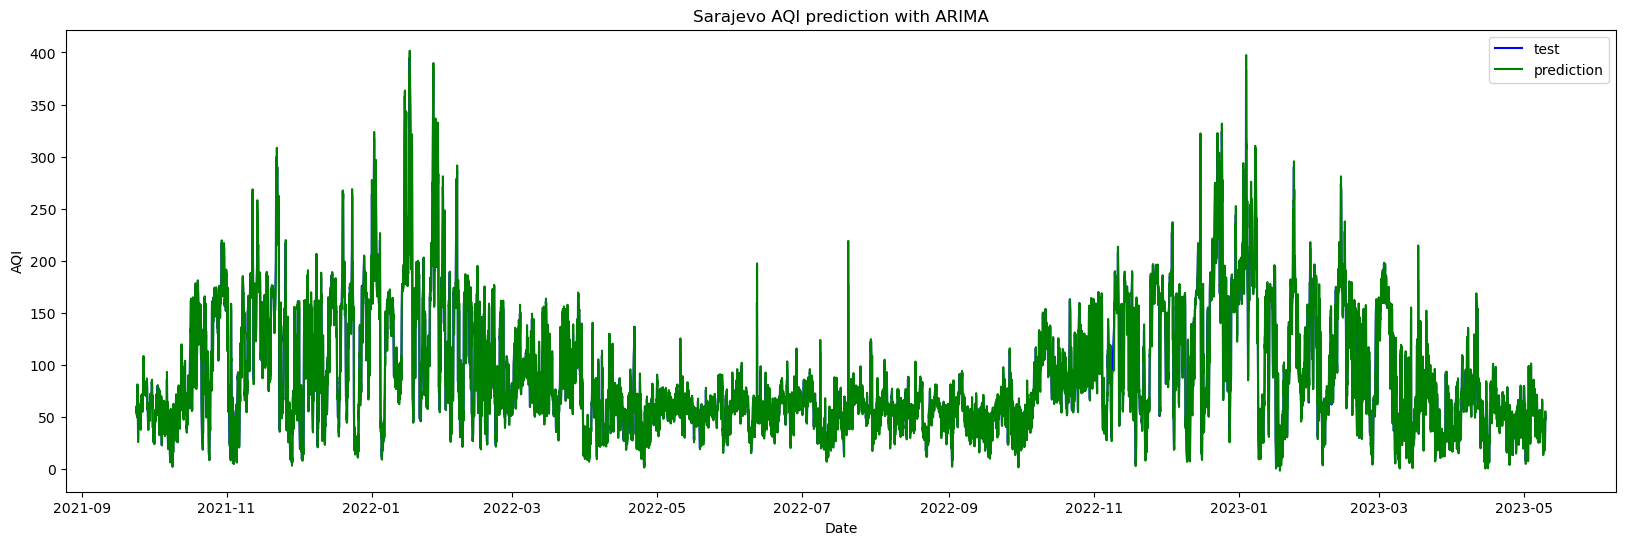

In [11]:
# plot forecasts against actual outcomes
from matplotlib import pyplot

pyplot.figure(figsize=(20,6))
pyplot.plot(test, color='blue', label='test')
pyplot.plot(test.index, predictions, color='green', label='prediction')
pyplot.legend()
pyplot.xlabel("Date")
pyplot.ylabel("AQI")
pyplot.title("Sarajevo AQI prediction with ARIMA")
pyplot.savefig('C:/Pythondatasets/ARIMA/ARIMA_Prediction_Sarajevo.png')
pyplot.show()


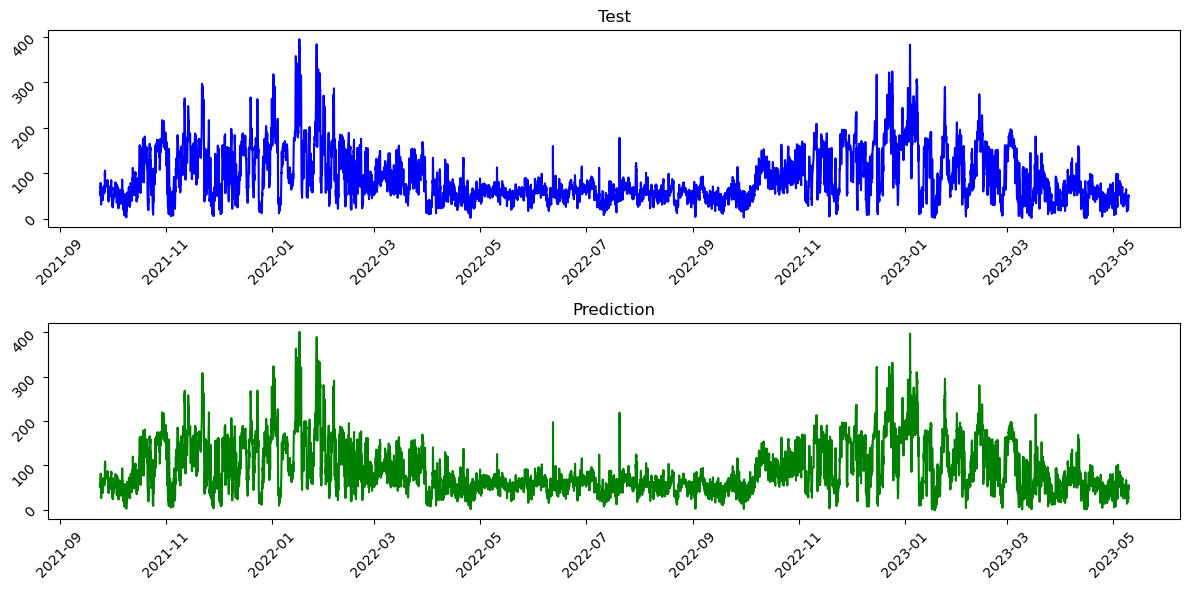

In [12]:
# Initialise the subplot function using number of rows and columns
test2=series[size:len(series)]
figure, axis = pyplot.subplots(2, 1, figsize=(12, 6))

# For Sine Function
axis[0].plot(test2, color='blue')
axis[0].set_title("Test")
axis[0].tick_params(labelrotation=45)

# For Tangent Function
axis[1].plot(test2.index, predictions, color='green')
axis[1].set_title("Prediction")
axis[1].tick_params(labelrotation=45)

figure.tight_layout()

pyplot.savefig('C:/Pythondatasets/ARIMA/ARIMA_Prediction_Sarajevo_Dvije_sLike_final.png')
# Combine all the operations and display
pyplot.show()

In [15]:
print(test)

Date (LT)
2021-09-24 01:00:00    59
2021-09-24 02:00:00    56
2021-09-24 03:00:00    56
2021-09-24 04:00:00    57
2021-09-24 05:00:00    58
                       ..
2023-05-09 21:00:00    34
2023-05-09 22:00:00    42
2023-05-09 23:00:00    52
2023-05-10 00:00:00    49
2023-05-10 01:00:00    49
Name: AQI, Length: 14100, dtype: int64


In [54]:
print(series)

Date (LT)
2018-05-22 17:00:00    42
2018-05-22 18:00:00    59
2018-05-22 19:00:00    55
2018-05-22 20:00:00    61
2018-05-22 21:00:00    55
                       ..
2023-04-30 21:00:00    58
2023-04-30 22:00:00    75
2023-04-30 23:00:00    76
2023-05-01 00:00:00    79
2023-05-01 01:00:00    79
Name: AQI, Length: 41477, dtype: int64


In [15]:
print(predictions)

[53.611180104538256, 60.51325457110653, 55.20075899490446, 56.019413424858236, 57.355374135657335, 58.22458622133375, 52.960758187021376, 49.74509222776788, 50.962269586973875, 67.13675935231845, 74.17405572225269, 81.44726904882087, 71.81161282574236, 65.10119397682422, 65.20876044665754, 70.25353961185631, 56.422832884250376, 40.09049721350185, 26.0705226335094, 40.579954668237306, 58.07945062473745, 55.447059814151864, 56.00440950580848, 56.214824827211196, 47.64528513508257, 54.15149389126758, 61.05055416988776, 57.95643299128923, 51.26430275097431, 52.35993480950134, 54.475814002047684, 53.13102088736902, 58.31455268253401, 54.239402110960526, 54.87321537784566, 58.97001692210308, 60.671130093136796, 61.47810043460763, 56.78505698849734, 53.76137975632433, 53.68461922808071, 56.845463829144954, 48.34748796950844, 37.86611144387753, 63.292541591108844, 60.18580110207103, 64.51199952476102, 66.41486705987748, 67.82268383556257, 71.08757749216113, 67.1151226170738, 66.47261995456648,

In [76]:
print(test2)

Date (LT)
2021-09-24 01:00:00    59
2021-09-24 02:00:00    56
2021-09-24 03:00:00    56
2021-09-24 04:00:00    57
2021-09-24 05:00:00    58
                       ..
2023-04-30 21:00:00    58
2023-04-30 22:00:00    75
2023-04-30 23:00:00    76
2023-05-01 00:00:00    79
2023-05-01 01:00:00    79
Name: AQI, Length: 14103, dtype: int64


In [13]:
res = pd.DataFrame(predictions)
res.index = test.index # its important for comparison
res.columns = ["AQI"]
res.to_csv("C:/Pythondatasets/ARIMA/Predictions_Sarajevo_ARIMA.csv")

In [14]:
res = pd.DataFrame(test)
res.index = test.index # its important for comparison
res.columns = ["AQI"]
res.to_csv("C:/Pythondatasets/ARIMA/Test_Sarajevo_ARIMA.csv")

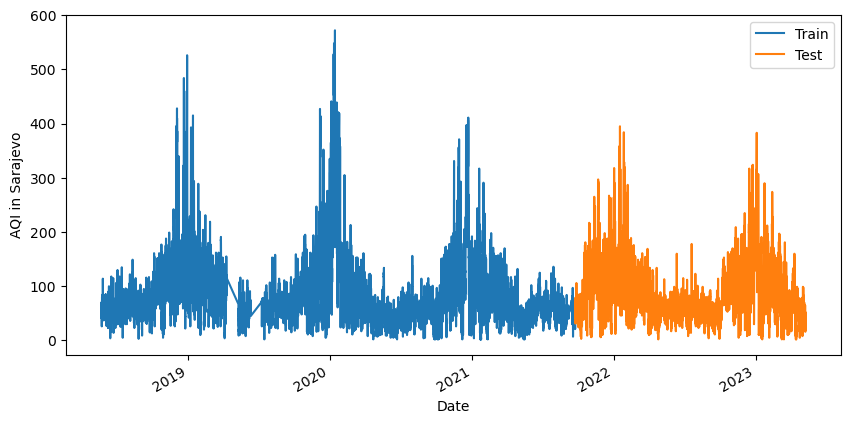

In [8]:
# Split into training and testing
df_train = train
df_test = test

# Plot the last 10 years of training data and the 2 of testing
ax = df_train.plot(figsize=(10, 5))
df_test.plot(ax=ax)
pyplot.legend(['Train', 'Test'])
pyplot.xlabel('Date')
pyplot.ylabel('AQI in Sarajevo')
pyplot.savefig('C:/Pythondatasets/AQI_Sarajevo_train_test.png')
pyplot.show()

In [9]:
df_new = data[['AQI']].copy()
df_new

,AQI
Date (LT),
2018-05-22 17:00:00,42
2018-05-22 18:00:00,59
2018-05-22 19:00:00,55
2018-05-22 20:00:00,61
2018-05-22 21:00:00,55
...,...
2023-05-09 21:00:00,34
2023-05-09 22:00:00,42
2023-05-09 23:00:00,52


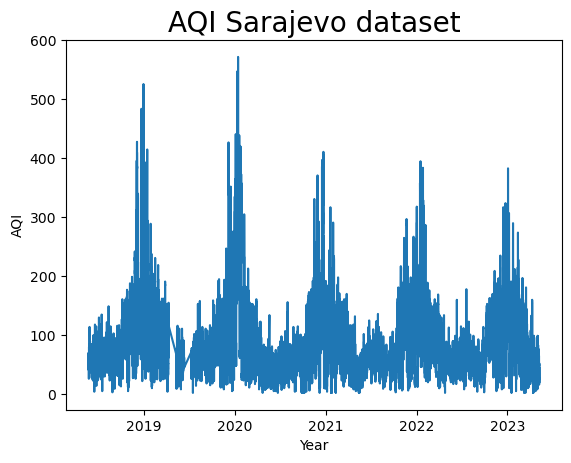

In [10]:
#vizualizacija vremenske serije
pyplot.title('AQI Sarajevo dataset', size=20)
pyplot.plot(df_new)
pyplot.xlabel("Year")
pyplot.ylabel("AQI")
pyplot.savefig('C:/Pythondatasets/SARIMA/AQI_Sarajevo.png')

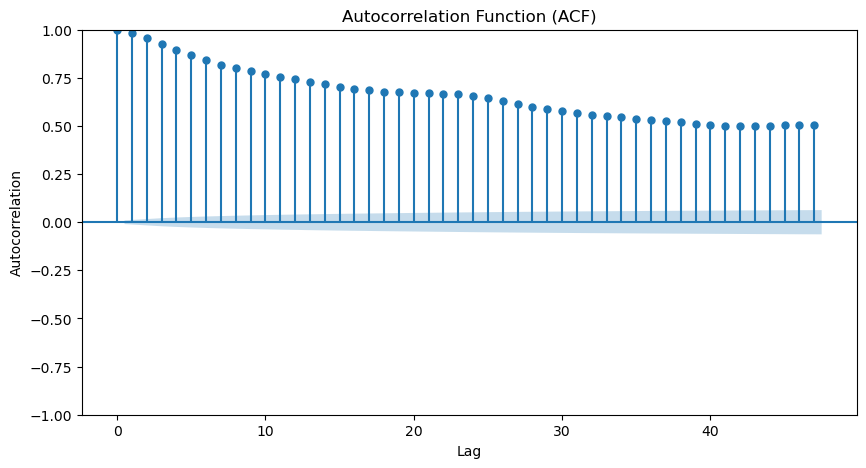

C:\Users\Korisnik\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


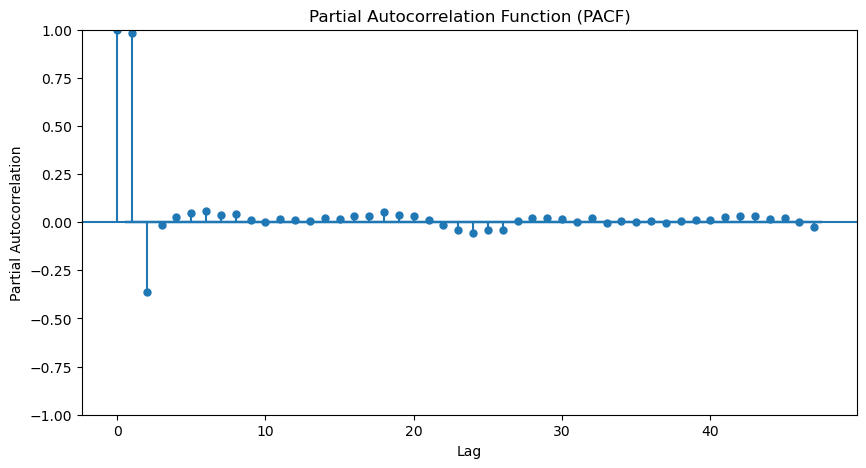

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = pyplot.subplots(figsize=(10, 5))
plot_acf(df_new, ax=ax)
pyplot.xlabel('Lag')
pyplot.ylabel('Autocorrelation')
pyplot.title('Autocorrelation Function (ACF)')
pyplot.show()

# Plot PACF
fig, ax = pyplot.subplots(figsize=(10, 5))
plot_pacf(df_new, ax=ax)
pyplot.xlabel('Lag')
pyplot.ylabel('Partial Autocorrelation')
pyplot.title('Partial Autocorrelation Function (PACF)')
pyplot.show()

In [13]:
#log transformacija vremenske serije
df_log = df_new
df_log['AQI']= np.log(df_log['AQI'])
df_log_return = df_log.diff().iloc[1: , :]

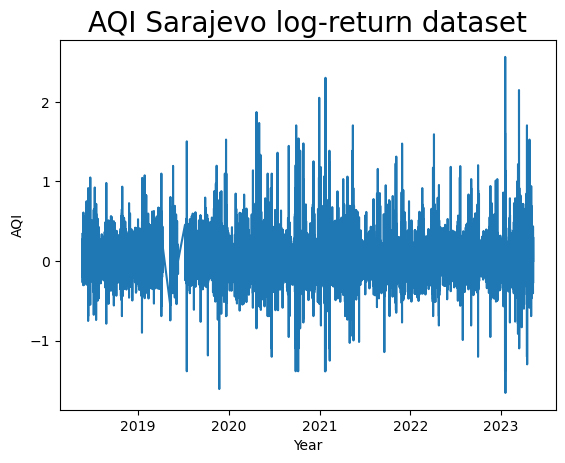

In [14]:
#vizualizacija log-return vremenske serije
pyplot.title('AQI Sarajevo log-return dataset', size=20)
pyplot.plot(df_log_return['AQI'])
pyplot.xlabel("Year")
pyplot.ylabel("AQI")
pyplot.savefig('C:/Pythondatasets/SARIMA/AQI_Sarajevo_log-return.png')
#time-plot ukazuje na promjene u varijansi, sto cemo rijesiti sezonalnim diferenciranjem u narednim koracima

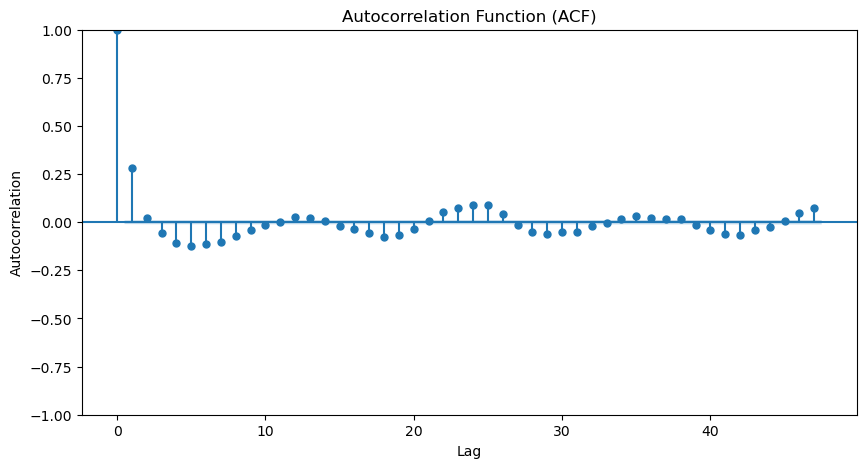

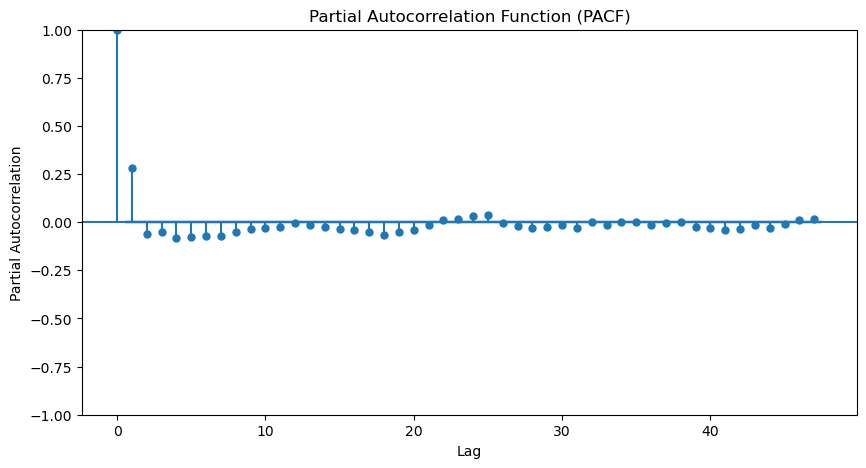

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
fig, ax = pyplot.subplots(figsize=(10, 5))
plot_acf(df_log_return, ax=ax)
pyplot.xlabel('Lag')
pyplot.ylabel('Autocorrelation')
pyplot.title('Autocorrelation Function (ACF)')
pyplot.savefig('C:/Pythondatasets/SARIMA/AQI_Sarajevo_log-return_ACF.png')
pyplot.show()

# Plot PACF
fig, ax = pyplot.subplots(figsize=(10, 5))
plot_pacf(df_log_return, ax=ax)
pyplot.xlabel('Lag')
pyplot.ylabel('Partial Autocorrelation')
pyplot.title('Partial Autocorrelation Function (PACF)')
pyplot.savefig('C:/Pythondatasets/SARIMA/AQI_Sarajevo_log-return_PACF.png')
pyplot.show()